In [14]:
# import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
import folium
from geopy.geocoders import Nominatim
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('data.csv', nrows=10000)

In [16]:
file_path = 'data.csv'  # Replace with the actual path to your CSV file

# Initialize a count variable to keep track of the number of entries
count = 0

# Open the CSV file and iterate through its lines to count the entries
with open(file_path, 'r') as file:
    for line in file:
        count += 1

# Subtract 1 to exclude the header row if your CSV file has one
count -= 1

print("Number of entries in the CSV file:", count)
print("Number of columns in the CSV file:", df.shape[1])

Number of entries in the CSV file: 3577296
Number of columns in the CSV file: 87


In [17]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [18]:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


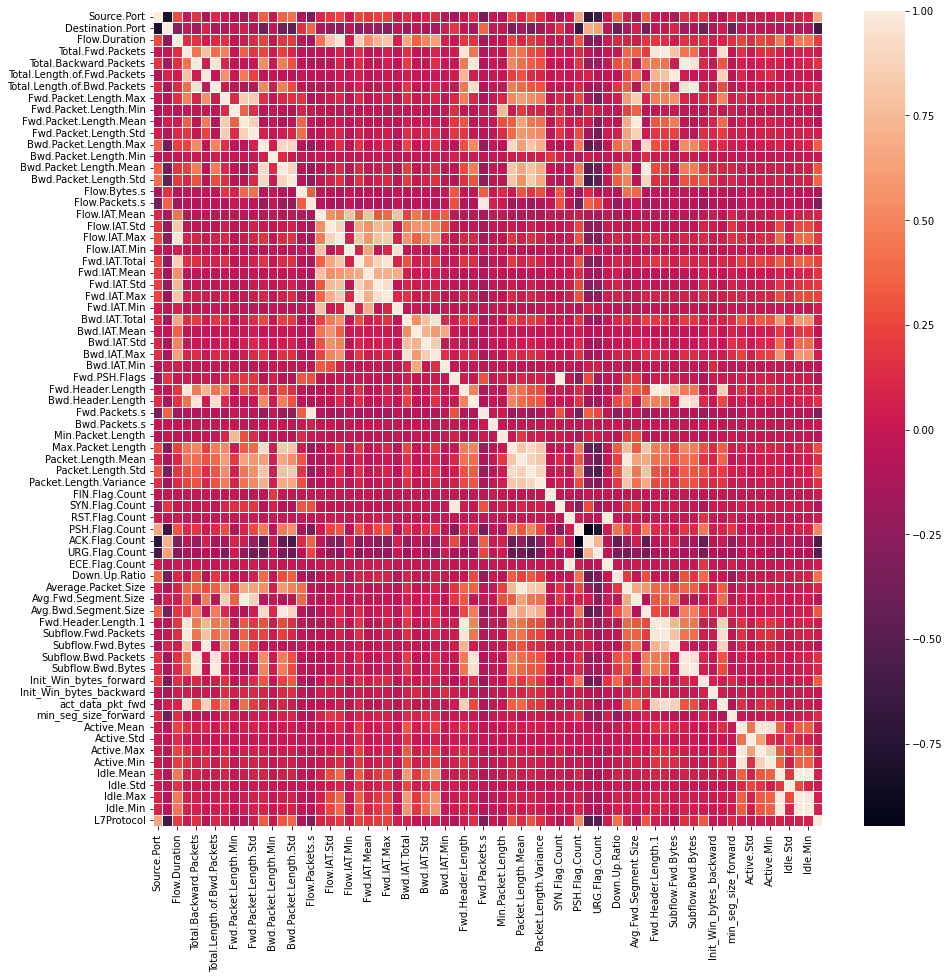

In [20]:
numeric_data = df.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr_matrix, lw=1)
plt.show()

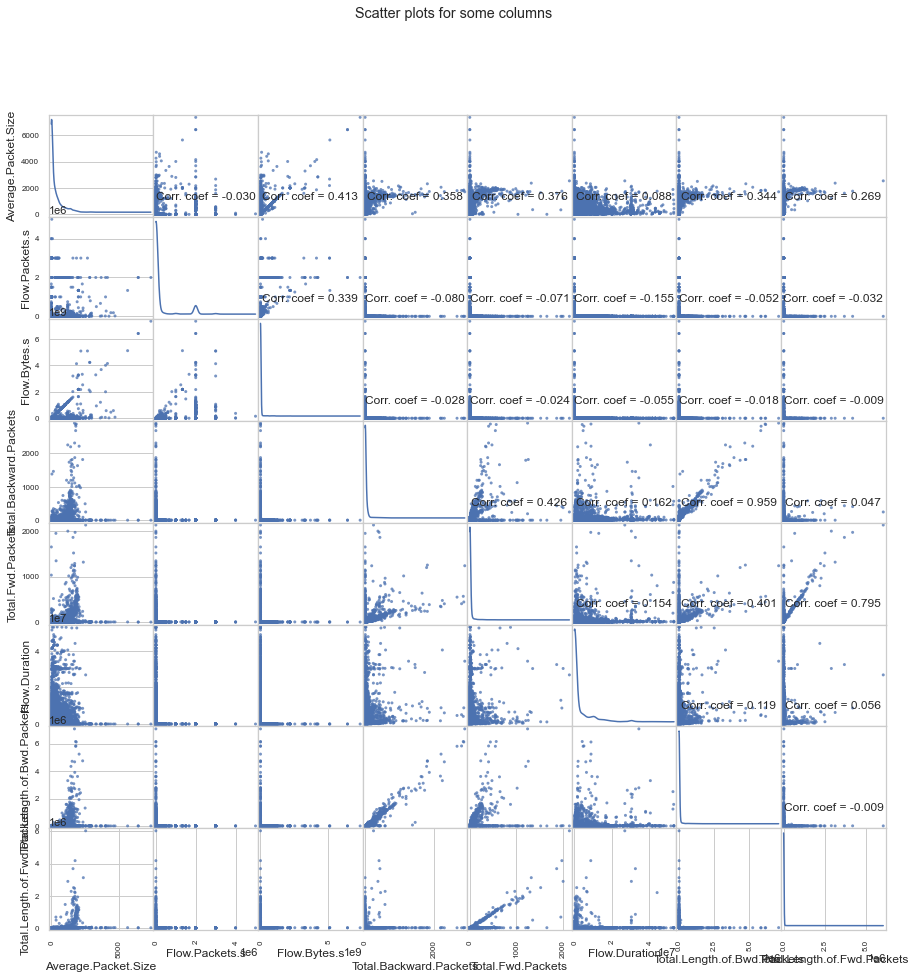

In [38]:
ipMeasureColumns = ['Average.Packet.Size','Flow.Packets.s','Flow.Bytes.s','Total.Backward.Packets','Total.Fwd.Packets','Flow.Duration', 'Total.Length.of.Bwd.Packets', 'Total.Length.of.Fwd.Packets']

ax = pd.plotting.scatter_matrix(df[ipMeasureColumns], alpha=0.75, figsize=[15,15], diagonal='kde')
corrs = df[ipMeasureColumns].corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.2), xycoords='axes fraction', ha='center', va='center')
plt.suptitle('Scatter plots for some columns')
plt.show()

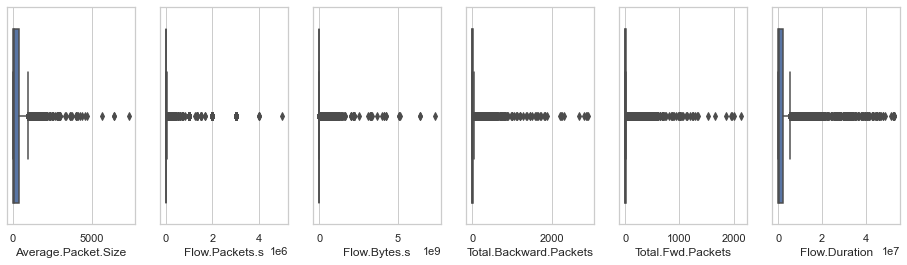

In [42]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(ipMeasureColumns):
    sns.boxplot(x=df[col], ax=ax[axid])

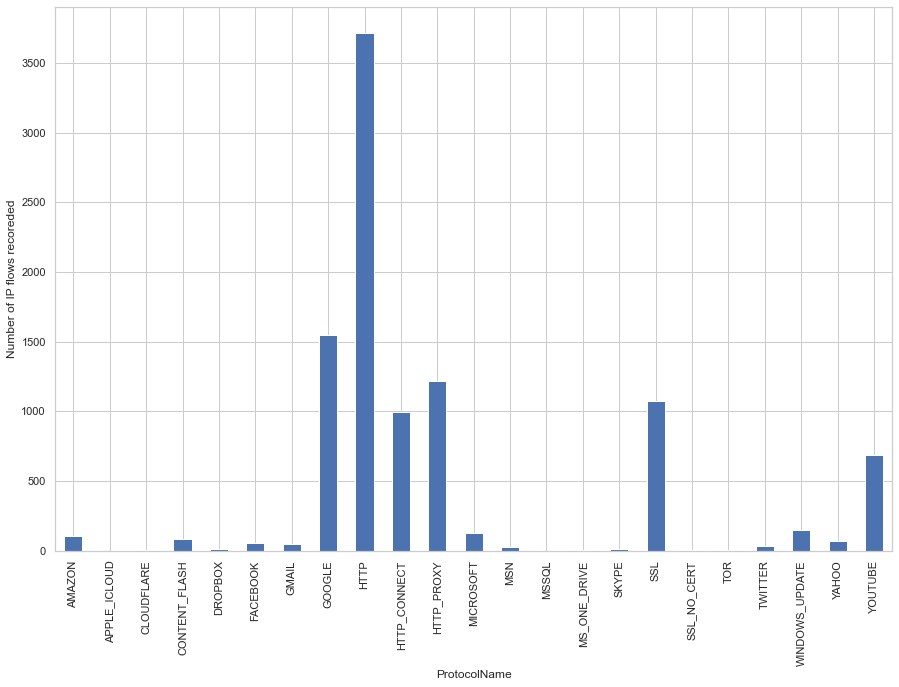

In [32]:
df.groupby('ProtocolName').size().plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of IP flows recoreded')
plt.show()

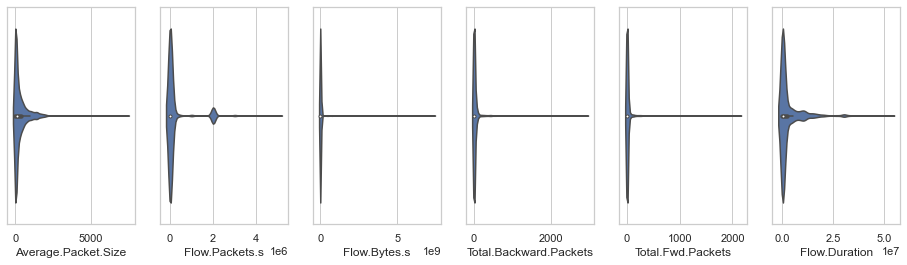

In [33]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(ipMeasureColumns):
    sns.violinplot(x=df[col], ax=ax[axid])